<h1>US Traffic Fatality Analysis<br>By: Jack Ross</h1>

![ChessUrl](https://media.giphy.com/media/Rzzr8gtjCxPck/giphy.gif "crash")


<h2>Research Question:</h2><br><br>Why has there been an increase in traffic fatalities over the last 10 years while the rate of seatbelt use has gone up and the rate of cell phone use has gone down? Why does it seem that driving is safer than it was 10 years ago but your chances of dying are higher?

<h3>Load the Python libraries that we'll be using for this analysis.</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

<h3>Read in our aggregated crash dataset.</h3>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Traffic-Fatality-Analysis/master/crash-data-large.csv')

In [3]:
# We would also check for NaN values here but I have taken care of NaN values while putting the data together

<h3>Visualize rows and columns to get a better idea of how different variables correlate.</h3>

In [4]:
df

,Year,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Fatal Crashes,33654.00,34560.00,34748.00,32538.00,30056.00,30202.00,31006.00,29867.00,30296.00,30862.00
1,Drivers,18250.00,18816.00,18717.00,17615.00,16470.00,16520.00,16838.00,16474.00,16864.00,17670.00
2,Passengers,5915.00,6237.00,6485.00,6213.00,5766.00,5896.00,6106.00,5972.00,6451.00,6793.00
3,Unknown,56.00,74.00,74.00,71.00,71.00,67.00,73.00,64.00,56.00,63.00
4,Motorcyclists,4985.00,5229.00,5337.00,5029.00,4594.00,4692.00,4986.00,4630.00,4518.00,4469.00
5,Pedestrians,6283.00,6075.00,6080.00,5494.00,4910.00,4779.00,4818.00,4457.00,4302.00,4109.00
6,Pedalcyclists,857.00,806.00,853.00,829.00,729.00,749.00,734.00,682.00,623.00,628.00
7,Other/ Unknown,214.00,236.00,260.00,233.00,204.00,190.00,227.00,200.00,185.00,151.00
8,Total,36560.00,37473.00,37806.00,35484.00,32744.00,32893.00,33782.00,32479.00,32999.00,33883.00
9,Vehicle Miles Traveled (Billions),3.21,3.18,3.11,3.04,2.98,2.97,2.96,2.97,2.95,2.96


Above we can see that the features for the dataset are actually displayed as rows. To avoid errors in pandas I'm going to transpose the dataset so the rows and columns are switched.

In [5]:
dft = df.T

In [6]:
dft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Year,Fatal Crashes,Drivers,Passengers,Unknown,Motorcyclists,Pedestrians,Pedalcyclists,Other/ Unknown,Total,Vehicle Miles Traveled (Billions),Resident Population (Thousands),Registered Vehicles (Millions),Licensed Drivers (Thousands),Seatbelt Use,Handheld Cellphone Use Rate,Visable Headset Cellphone Use Rate,Visable Manipulation of Handheld Device Rate,Restrain Use of Children Under 8 Rate,Distracted Driving Affected Crashes,Drunk Driving Fatalities (Per 100 million)
2018,33654,18250,5915,56,4985,6283,857,214,36560,3.21,327167,279.1,227500,89.6,3.2,0.4,2.1,90.4,4637,10511
2017,34560,18816,6237,74,5229,6075,806,236,37473,3.18,325147,270.4,225346,89.7,2.9,0.4,2,92.8,3166,10908
2016,34748,18717,6485,74,5337,6080,853,260,37806,3.11,323071,264,221712,90.1,3.3,0.5,2.1,90.9,3526,10967
2015,32538,17615,6213,71,5029,5494,829,233,35484,3.04,320743,257.9,218084,88.5,3.8,0.6,2.2,89.8,3477,10280
2014,30056,16470,5766,71,4594,4910,729,204,32744,2.98,318386,252.6,214092,86.7,4.3,0.4,2.2,90.9,3179,9943
2013,30202,16520,5896,67,4692,4779,749,190,32893,2.97,315993,255.8,212160,87.2,4.6,0.5,1.7,88.6,3154,10076
2012,31006,16838,6106,73,4986,4818,734,227,33782,2.96,313830,253.6,211815,86.1,5.2,0.6,1.5,91.5,3328,10322
2011,29867,16474,5972,64,4630,4457,682,200,32479,2.97,311556,253.1,211875,83.8,4.8,0.6,1.3,91.4,3331,9878
2010,30296,16864,6451,56,4518,4302,623,185,32999,2.95,309371,250,210115,85.1,4.9,0.9,0.9,88.9,3092,10228


In [7]:
# How to export dataframes to CSV files:
#dft.to_csv(filelocation/name.csv)

This is almost what we want our data to look like before we analyze it. I've done a little bit more tweaking to the transposed dataset inside the CSV so we won't have to mess with that in Python.

In [8]:
# Read in transposed and cleaned dataset
df = pd.read_csv("https://raw.githubusercontent.com/JackRossProjects/Traffic-Fatality-Analysis/master/transposed-large-data.csv", header=0)

In [9]:
df

,Year,Fatal Crashes,Drivers,Passengers,Unknown,Motorcyclists,Pedestrians,Pedalcyclists,Other/ Unknown,Total,...,Resident Population (Thousands),Registered Vehicles (Millions),Licensed Drivers (Thousands),Seatbelt Use,Handheld Cellphone Use Rate,Visable Headset Cellphone Use Rate,Visable Manipulation of Handheld Device Rate,Restrain Use of Children Under 8 Rate,Distracted Driving Affected Crashes,Drunk Driving Fatalities
0,2018,33654.0,18250.0,5915.0,56.0,4985.0,6283.0,857.0,214.0,36560.0,...,327167.0,279.1,227500.0,89.6,3.2,0.4,2.1,90.4,4637.0,10511.0
1,2017,34560.0,18816.0,6237.0,74.0,5229.0,6075.0,806.0,236.0,37473.0,...,325147.0,270.4,225346.0,89.7,2.9,0.4,2.0,92.8,3166.0,10908.0
2,2016,34748.0,18717.0,6485.0,74.0,5337.0,6080.0,853.0,260.0,37806.0,...,323071.0,264.0,221712.0,90.1,3.3,0.5,2.1,90.9,3526.0,10967.0
3,2015,32538.0,17615.0,6213.0,71.0,5029.0,5494.0,829.0,233.0,35484.0,...,320743.0,257.9,218084.0,88.5,3.8,0.6,2.2,89.8,3477.0,10280.0
4,2014,30056.0,16470.0,5766.0,71.0,4594.0,4910.0,729.0,204.0,32744.0,...,318386.0,252.6,214092.0,86.7,4.3,0.4,2.2,90.9,3179.0,9943.0
5,2013,30202.0,16520.0,5896.0,67.0,4692.0,4779.0,749.0,190.0,32893.0,...,315993.0,255.8,212160.0,87.2,4.6,0.5,1.7,88.6,3154.0,10076.0
6,2012,31006.0,16838.0,6106.0,73.0,4986.0,4818.0,734.0,227.0,33782.0,...,313830.0,253.6,211815.0,86.1,5.2,0.6,1.5,91.5,3328.0,10322.0
7,2011,29867.0,16474.0,5972.0,64.0,4630.0,4457.0,682.0,200.0,32479.0,...,311556.0,253.1,211875.0,83.8,4.8,0.6,1.3,91.4,3331.0,9878.0
8,2010,30296.0,16864.0,6451.0,56.0,4518.0,4302.0,623.0,185.0,32999.0,...,309371.0,250.0,210115.0,85.1,4.9,0.9,0.9,88.9,3092.0,10228.0
9,2009,30862.0,17670.0,6793.0,63.0,4469.0,4109.0,628.0,151.0,33883.0,...,307007.0,254.2,209618.0,84.1,5.0,0.6,0.6,88.0,4898.0,10839.0


<h3>Above is our cleaned dataset that we will use for analysis.</h3>

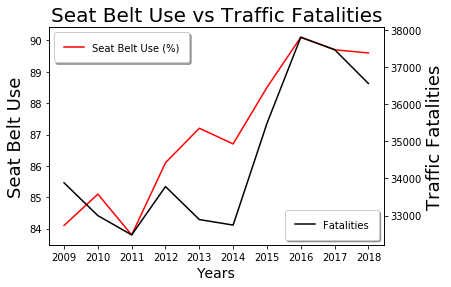

In [10]:
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Seatbelt Use', data=df, ax=ax, color='r', label='Seat Belt Use (%)')
ax2 = ax.twinx()

sns.lineplot(x='Year', y='Total', data=df, ax=ax2, color='black', label='Fatalities')

ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Seat Belt Use', fontsize=18)
ax2.set_ylabel('Traffic Fatalities', fontsize=18)
ax2.set_title('Seat Belt Use vs Traffic Fatalities', fontsize=20)

ax.legend(["Seat Belt Use (%)"], loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.legend(["Fatalities"], loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show();

In [11]:
print("Correlation: ")
print(df['Total'].corr(df['Seatbelt Use']))

Correlation: 
0.8592090593415543



As we can see in the graph above, there has been an 7.9% increase in traffic fatalities since 2009 from 33,883 to 36,560 deaths per year and a 11.7% increase in deaths in just the last 5 years. During this time, there was a 5.5% rise in seat belt usage.<br><br>
The correlation calculation shows that the total amount of traffic fatalities does have a slightly positive linear correlation to seat belt use. We don't have any data to determine why there is a correlation here but I would assume that as yearly traffic fatalities rise, more people hear about the dangers of driving, prompting more people to use their seat belts.

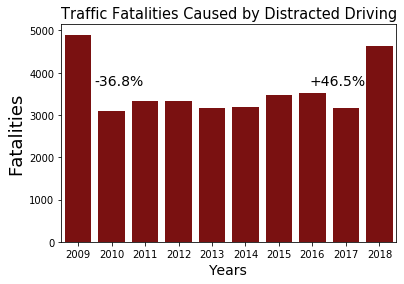

In [12]:
ax = sns.barplot(x='Year', y='Distracted Driving Affected Crashes', data=df, color='darkred')

ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Fatalities', fontsize=18)
ax.set_title('Traffic Fatalities Caused by Distracted Driving', fontsize=14.5)
ax.text(.5, 3700,'-36.8%', fontsize=14)
ax.text(6.9, 3700,'+46.5%', fontsize=14);

The chart above is quite interesting. After seeing a 36.8% decrease in the number of distracted driving related fatalities from 2009 to 2010, the number of distracted driving fatalities stayed in the range of 3,092 to  3,526 until 2018 when we see a massive 46.5% spike in fatalities from 2017.

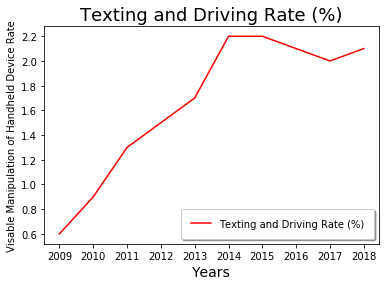

In [13]:
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Visable Manipulation of Handheld Device Rate', data=df, ax=ax, color='r', label='Texting and Driving')


sns.lineplot(x='Year', y='Total', data=df, ax=ax2, color='black', label='Fatalities')

ax.set_xlabel('Years', fontsize=14)
ax.set_title('Texting and Driving Rate (%)', fontsize=18)

ax.legend(["Texting and Driving Rate (%)"], loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show();

In [14]:
small_df = df.drop(['Drivers','Passengers','Unknown','Motorcyclists','Pedestrians',
                   'Pedalcyclists', 'Other/ Unknown','Restrain Use of Children Under 8 Rate','Resident Population (Thousands)','Fatal Crashes','Seatbelt Use','Distracted Driving Affected Crashes'], axis=1)

small_df = small_df.set_index('Year')

In [15]:
small_df

,Total,Vehicle Miles Traveled (Billions),Registered Vehicles (Millions),Licensed Drivers (Thousands),Handheld Cellphone Use Rate,Visable Headset Cellphone Use Rate,Visable Manipulation of Handheld Device Rate,Drunk Driving Fatalities
Year,,,,,,,,
2018,36560.0,3.21,279.1,227500.0,3.2,0.4,2.1,10511.0
2017,37473.0,3.18,270.4,225346.0,2.9,0.4,2.0,10908.0
2016,37806.0,3.11,264.0,221712.0,3.3,0.5,2.1,10967.0
2015,35484.0,3.04,257.9,218084.0,3.8,0.6,2.2,10280.0
2014,32744.0,2.98,252.6,214092.0,4.3,0.4,2.2,9943.0
2013,32893.0,2.97,255.8,212160.0,4.6,0.5,1.7,10076.0
2012,33782.0,2.96,253.6,211815.0,5.2,0.6,1.5,10322.0
2011,32479.0,2.97,253.1,211875.0,4.8,0.6,1.3,9878.0
2010,32999.0,2.95,250.0,210115.0,4.9,0.9,0.9,10228.0


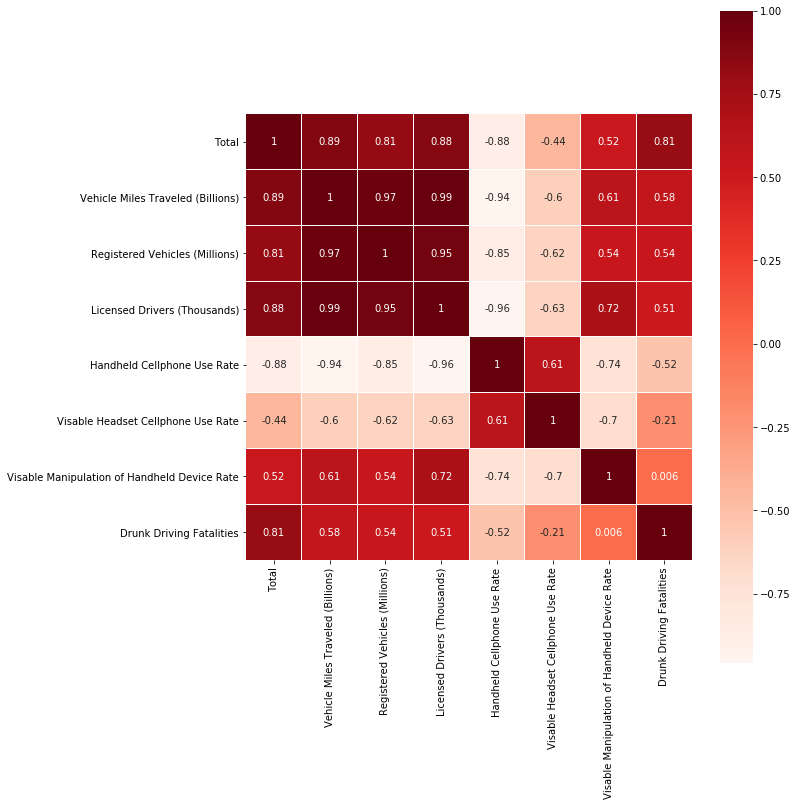

In [16]:
corr = small_df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220,10, as_cmap=True)

_ = sns.heatmap(corr, cmap='Reds', square=True, ax=ax, annot=True, linewidth = 0.1)

<h2>The correlation map above shows that the amount of miles driven, the amount of licensed drivers, the amount of registered vehicles, and the number of drunk driving fatalities are all linearly dependent on the total amount of traffic fatalities each year.<br><br>Visible manipulation of handheld devices (texting and driving) seems to contribute much more to the total amount of traffic fatalities than handheld cellphone use (phone calls) or headset (hands free phone calls) use.</h2>

<h3>The data used is an aggregation of National Highway Traffic Safety Administration (NHTSA), Department of Transportation (DOT), and other data. The sources for the data are available <a href="https://github.com/JackRossProjects/Traffic-Fatality-Analysis/blob/master/data-sources.txt" target="_blank">here</a> and the aggregated CSV is available <a href="https://github.com/JackRossProjects/Traffic-Fatality-Analysis/blob/master/crash-data.csv" target="_blank">here</a>.</h3>